In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## 1. Read data

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The column "smoker" is labeled as yes and no. Let's change it to 0 and 1

In [6]:
# Convert categorical data to numerical data
label_encoder = LabelEncoder()

# Sex
label_encoder.fit(data["sex"])
data["sex"] = label_encoder.transform(data["sex"])

# Smoker
label_encoder.fit(data["smoker"])
data["smoker"] = label_encoder.transform(data["smoker"])

# Region
label_encoder.fit(data["region"])
data["region"] = label_encoder.transform(data["region"])


In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## 2. Data Analysis

<AxesSubplot:>

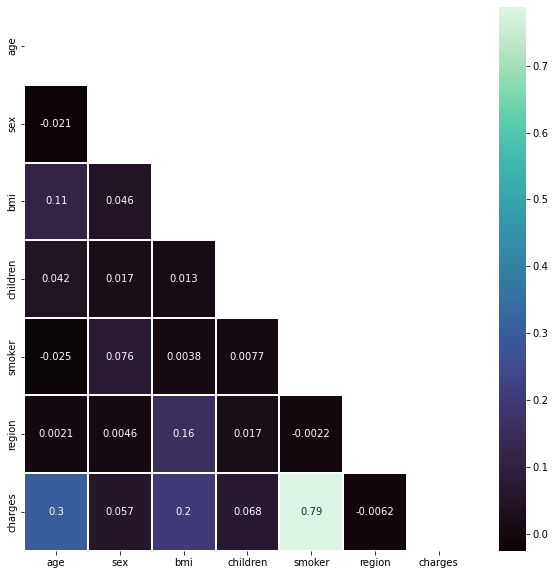

In [8]:
# Analyze Pearson correlation between the features
plt.figure(figsize=(10, 10))

# Generate a mask for the upper triangle
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True

# Create colormap for better visualization
colormap = sns.color_palette("mako", as_cmap=True)

sns.heatmap(data.corr(), annot=True, mask=mask, cmap=colormap, linewidths=0.3)

We observe high correlation between smoking and charges.

<AxesSubplot:xlabel='charges', ylabel='Count'>

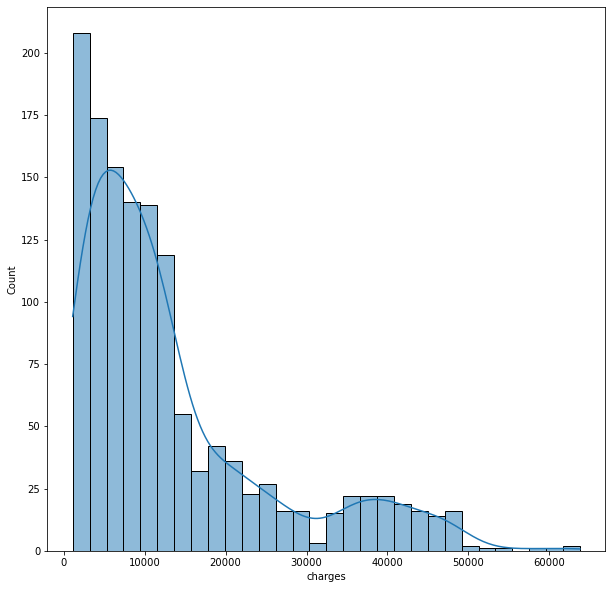

In [9]:
# See the distribution of charges
plt.figure(figsize=(10, 10))
sns.histplot(data["charges"], kde=True)


<AxesSubplot:xlabel='smoker', ylabel='charges'>

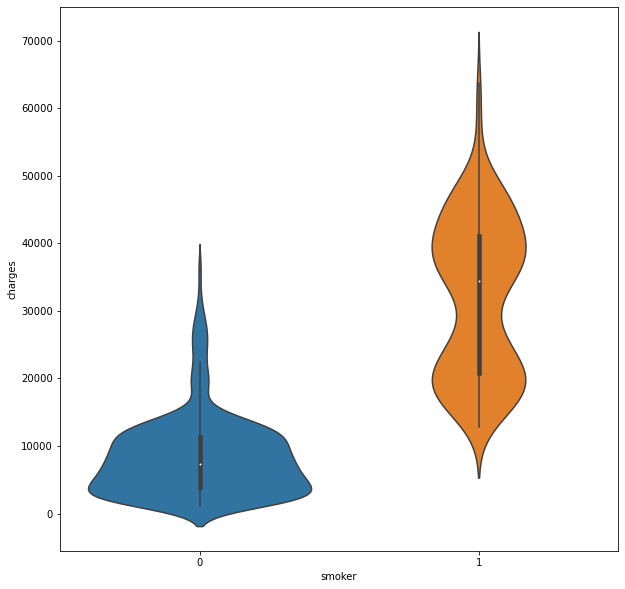

In [10]:
# Let's see if smoking has an effect on the insurance cost

plt.figure(figsize=(10, 10))
sns.violinplot(x='smoker', y='charges', data=data)

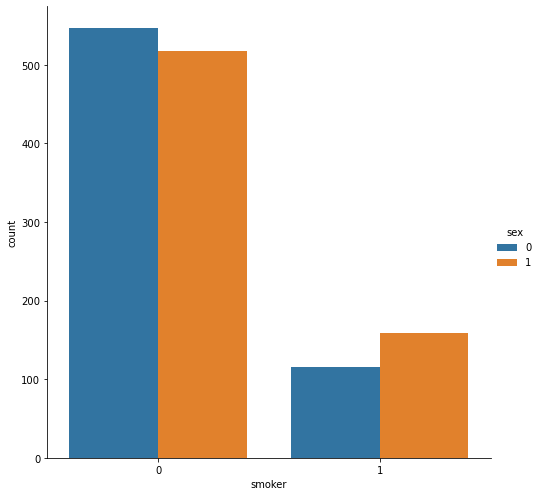

In [11]:
# Let's see the sex distribution of smokers and non-smokers
sns.catplot(x="smoker", hue="sex", kind="count", data=data, height=7, aspect=1)

<AxesSubplot:xlabel='age_group', ylabel='charges'>

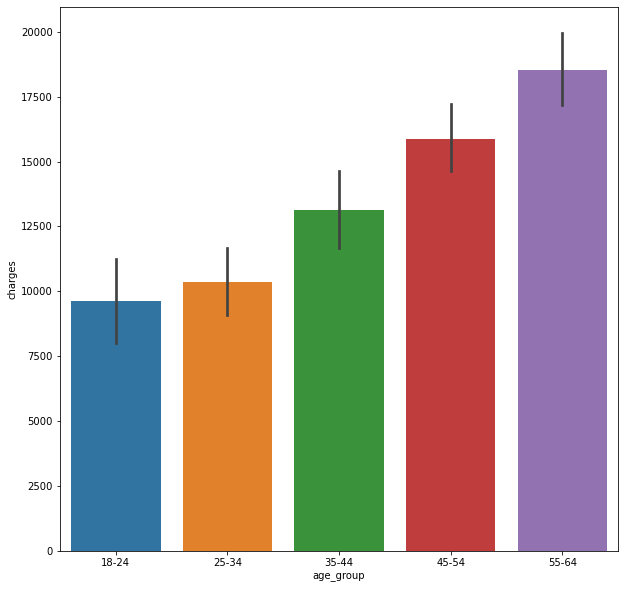

In [12]:
# Analyze different age groups
age_bins = [18, 24, 34, 44, 54, 64]
age_labels = ["18-24", "25-34", "35-44", "45-54", "55-64"]
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(10, 10))
sns.barplot(data=data, x = 'age_group', y = 'charges')